# 🌍 Informe de Análisis del Clima en Ciudades del Mundo

## 1. 🔌 Conexión a la API

- Elige una **API de clima**.
- Obtén una **clave API** y pruébala realizando una petición a una sola ciudad.
- Solicita datos como:

  - **Nombre de la ciudad**
  - **Temperatura (°C)**
  - **Humedad (%)**
  - **Velocidad del viento** (m/s o km/h)
  - **Descripción del clima** (por ejemplo, “cielo despejado”)


In [17]:
import requests
import pandas as pd
import country_converter as coco
import matplotlib.pyplot as plt

API_KEY ="a9f821b9935854e146bbe7a6c8ef65b0"

url ="https://api.openweathermap.org/data/2.5/weather"

params ={
    "q": "A Coruña",
    "appid": API_KEY,
    "units": "metric", 
    "lang": "es"        
}

respuesta =requests.get(url, params=params)

data =respuesta.json()
    
weather_info = {
        "Ciudad": data['name'],
        "Temperatura": data['main']['temp'],
        "Humedad": data['main']['humidity'],
        "Velocidad Viento ": data['wind']['speed'],
        "Clima Descripcion": data['weather'][0]['description']
}
    
df =pd.DataFrame([weather_info]) 
print(df)


     Ciudad  Temperatura  Humedad  Velocidad Viento  Clima Descripcion
0  A Coruña         12.1       82               2.57        muy nuboso


## 2. 📝 Recolección de Datos

- Crea una lista de al menos **20 ciudades** de diferentes continentes.  
- Usa un **bucle en Python** para solicitar los datos de cada ciudad y almacenar los resultados.  
- Construye un **DataFrame de pandas** con una fila por cada ciudad.


In [18]:
ciudades = [
    "Madrid", "New York", "Tokyo", "Sydney", "Cairo",
    "Rio de Janeiro", "Moscow", "Cape Town", "Toronto", "Beijing",
    "Mumbai", "Buenos Aires", "Berlin", "Singapore", "Lagos",
    "Mexico City", "Seoul", "Istanbul", "Dubai", "Barcelona"
]
datos_ciudades = []
cc = coco.CountryConverter()

for ciudad in ciudades:
    params ={
    "q": ciudad,
    "appid": API_KEY,
    "units": "metric", 
    "lang": "es"        
    }

    respuesta =requests.get(url, params=params)

    data =respuesta.json()
        
    ciudades_info = {
        "Ciudad": data['name'],
        "Temperatura": data['main']['temp'],
        "Humedad": data['main']['humidity'],
        "Velocidad Viento": data['wind']['speed'],
        "Clima Descripcion": data['weather'][0]['description'],
        "Continente": cc.convert(data["sys"]["country"], to="continent")
}
    datos_ciudades.append(ciudades_info)
    


df = pd.DataFrame(datos_ciudades)
print(df)
    

            Ciudad  Temperatura  Humedad  Velocidad Viento Clima Descripcion  \
0           Madrid         7.21       71              1.54       cielo claro   
1         New York         7.02       42              8.75       cielo claro   
2            Tokyo        10.67       77              2.04       cielo claro   
3           Sydney        18.58       83              3.60     algo de nubes   
4            Cairo        17.42       63              3.60       cielo claro   
5   Rio de Janeiro        24.43       85              6.69        muy nuboso   
6           Moscow         5.40       63              3.24     lluvia ligera   
7        Cape Town        22.21       65              4.02       cielo claro   
8          Toronto         1.60       77             15.20     nevada ligera   
9          Beijing        -5.06       29              1.56             nubes   
10          Mumbai        25.99       69              0.00            niebla   
11    Buenos Aires        30.12       59

## 3. 🧹 Limpieza de Datos
- Se revisaron los datos en busca de valores faltantes o inconsistentes (por ejemplo, solicitudes fallidas a la API).  
- Se aseguraron formatos correctos para las columnas numéricas.  
- La temperatura se convirtió a **grados Celsius** cuando fue necesario.  
- Los datos finales se guardaron en un archivo **CSV** para su análisis.

In [19]:
datos_ciudades = []
errores = 0
for ciudad in ciudades:
    params = {
        "q": ciudad,
        "appid": API_KEY,
        "units": "metric",
        "lang": "es"
    }

    respuesta = requests.get(url, params=params)
    
    if respuesta.status_code == 200:
        data = respuesta.json()
        ciudades_info = {
            "Ciudad": data.get('name', ciudad),
            "Temperatura": data['main'].get('temp', None),
            "Humedad": data['main'].get('humidity', None),
            "Velocidad Viento": data['wind'].get('speed', None),
            "Clima Descripcion": data['weather'][0].get('description', None),
            "Continente": cc.convert(data["sys"]["country"], to="continent")
        }
        datos_ciudades.append(ciudades_info)
    else:
        errores+=1
        print(f"Error en la carga de los datos de {ciudad} (status {respuesta.status_code})")

if errores == 0:
    print(f"No se ha registrado ningún error en las solicitudes de la API")


df = pd.DataFrame(datos_ciudades)
# Convertimos columnas a numéricos
df["Temperatura"] = pd.to_numeric(df["Temperatura"], errors='coerce')
df["Humedad"] = pd.to_numeric(df["Humedad"], errors='coerce')
df["Velocidad Viento"] = pd.to_numeric(df["Velocidad Viento"], errors='coerce')
print(df)

# Eliminar filas con datos críticos faltantes
df.dropna(subset=["Temperatura", "Humedad"], inplace=True)


df.to_csv("datos_ciudades.csv", index=False, encoding='utf-8-sig')
    

No se ha registrado ningún error en las solicitudes de la API
            Ciudad  Temperatura  Humedad  Velocidad Viento Clima Descripcion  \
0           Madrid         7.21       71              1.54       cielo claro   
1         New York         7.02       42              8.75       cielo claro   
2            Tokyo        10.67       77              2.04       cielo claro   
3           Sydney        18.58       83              3.60     algo de nubes   
4            Cairo        17.42       63              3.60       cielo claro   
5   Rio de Janeiro        24.43       85              6.69        muy nuboso   
6           Moscow         5.40       63              3.24     lluvia ligera   
7        Cape Town        22.21       65              4.02       cielo claro   
8          Toronto         1.60       77             15.20     nevada ligera   
9          Beijing        -5.06       29              1.56             nubes   
10          Mumbai        25.99       69              0.00

 #### No he encontrado datos nulos en la API y los datos estas correctamente formateados a numéricos, de todas formas he añadido el código por posibles fallos futuros.

#### Se ha comentado la linea de creación del csv para que no intervenga con posibles aclaciones o respuestas de los próximos apartados

## 4. 📊 Análisis de Datos
Se respondieron preguntas clave:

- 🔥 **Ciudades más calientes y frías:** Se identificaron observando las temperaturas registradas por la API.  
- 💧 **Relación entre temperatura y humedad:** Se analizaron correlaciones entre estas variables.  
- 🌬 **Ciudades más ventosas por continente:** Se compararon las velocidades promedio del viento.  
- ☀️☁️🌧 **Descripción de clima más común:** Se identificó el tipo de clima más frecuente

In [22]:
import pandas as pd
import country_converter as coco

# Cargar datos limpios
df = pd.read_csv("datos_ciudades.csv")
print(df.columns.tolist())
# Top 10 ciudades más calientes
top10_calientes = df.sort_values("Temperatura", ascending=False).head(10)
print("Top 10 ciudades más calientes:")
print(top10_calientes[["Ciudad", "Temperatura"]].to_string(index=False))

# Top 10 ciudades más frías
top10_frias = df.sort_values("Temperatura").head(10)
print("\nTop 10 ciudades más frías:")
print(top10_frias[["Ciudad", "Temperatura"]].to_string(index=False))

# Top 10 ciudades más ventosas
top10_ventosas = df.sort_values("Velocidad Viento", ascending=False).head(10)
print("\nTop 10 ciudades más ventosas:")
print(top10_ventosas[["Ciudad", "Velocidad Viento"]].to_string(index=False))

# Top 10 tipos de clima más frecuentes
top10_climas = df["Clima Descripcion"].value_counts().head(10)
print("\nTop 10 tipos de clima más frecuentes:")
print(top10_climas.to_string())



# Top 10 ciudades más ventosas por continente
for continente in df["Continente"].unique():
    print(f"\n🌬 Top 10 ciudades más ventosas en {continente}:")
    top10 = df[df["Continente"] == continente].sort_values("Velocidad Viento", ascending=False).head(3)
    print(top10[["Ciudad", "Velocidad Viento"]].to_string(index=False))




['Ciudad', 'Temperatura', 'Humedad', 'Velocidad Viento', 'Clima Descripcion', 'Continente']
Top 10 ciudades más calientes:
        Ciudad  Temperatura
  Buenos Aires        30.12
     Singapore        27.68
         Lagos        26.42
        Mumbai        25.99
Rio de Janeiro        24.43
         Dubai        23.96
     Cape Town        22.21
   Mexico City        20.53
        Sydney        18.58
         Cairo        17.42

Top 10 ciudades más frías:
   Ciudad  Temperatura
  Beijing        -5.06
    Seoul        -1.24
  Toronto         1.60
   Berlin         3.37
   Moscow         5.40
 New York         7.02
   Madrid         7.21
Barcelona         9.27
    Tokyo        10.67
 Istanbul        13.68

Top 10 ciudades más ventosas:
        Ciudad  Velocidad Viento
       Toronto             15.20
      New York              8.75
Rio de Janeiro              6.69
        Berlin              4.47
     Barcelona              4.12
   Mexico City              4.12
     Cape Town            

## 5. 📈 Visualización de Datos
Se generaron gráficos para apoyar el análisis:

- **Gráfico de barras:** temperatura promedio por continente 🌡📊  
- **Diagrama de dispersión:** temperatura vs humedad 💧🌡

/tmp/ipykernel_6579/778593298.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=temp_promedio.index, y=temp_promedio.values, palette="coolwarm")
/tmp/ipykernel_6579/778593298.py:9: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/bigdata/yes/envs/sibd25/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


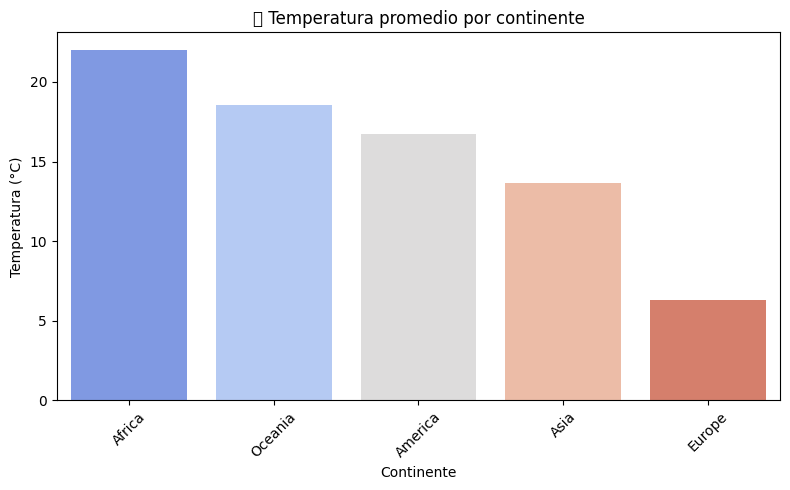

/tmp/ipykernel_6579/778593298.py:18: UserWarning: Glyph 128167 (\N{DROPLET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_6579/778593298.py:18: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/bigdata/yes/envs/sibd25/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128167 (\N{DROPLET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/bigdata/yes/envs/sibd25/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


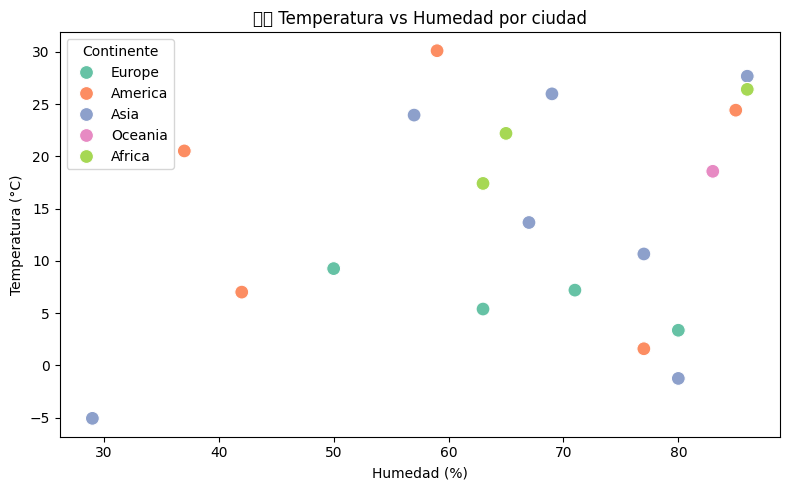

In [23]:
import seaborn as sns
temp_promedio = df.groupby("Continente")["Temperatura"].mean().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=temp_promedio.index, y=temp_promedio.values, palette="coolwarm")
plt.title("🌡 Temperatura promedio por continente")
plt.ylabel("Temperatura (°C)")
plt.xlabel("Continente")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Humedad", y="Temperatura", hue="Continente", palette="Set2", s=100)
plt.title("💧🌡 Temperatura vs Humedad por ciudad")
plt.xlabel("Humedad (%)")
plt.ylabel("Temperatura (°C)")
plt.legend(title="Continente")
plt.tight_layout()
plt.show()

## 6. 📝 Resumen
- **Proceso:** Se recopilaron datos mediante la API, se limpiaron y normalizaron, y se realizó un análisis exploratorio.  
- **Patrones interesantes:** Se observaron diferencias de temperatura y viento entre continentes y se identificó la descripción de clima más frecuente.  
- **Dificultades o limitaciones:** Algunas solicitudes a la API pudieron fallar o devolver datos incompletos. La muestra de 20 ciudades no es representativa de todo el mundo, por lo que los resultados son indicativos y no definitivos